# Lab 3: Building an Image Classifier from Scratch

Date of submission: 2020-11-27

Group-3 & members:
- Name (ID): Abhinav Sharma (0753639)-sec:006
- Name (ID): Nishant Mahajan (0753638)-sec:001
- Name (ID): Prashanth Nuthula (0753653)-sec:005
- Name (ID): Sai Sahas Elluru (0753808)-sec:003
- Name (ID): Siddharth Singh (0756590)-sec:005

The main goal of this lab is to create an image classifier from scratch using the Keras package. You will create a binary classifier based on an object type of your choice. The classifier will accept images and then predict whether or not a given image contains that object. For example, if you chose your object to be a cat, then the classifier would accept images and predict 1 if it believes there is a cat in the image or a 0 if not. 

You will build and train a classifier in two ways: 
- first using the original data set that you create, and 
- second, using data augmentation techniques. 

**Grading:** 

50% of the grade will come from error-free code that accomplishes all the steps outlined in the instructions for each part of this lab and written in Python/Keras. The other 50% will come from the comments associated with that code, where the comments explain what the code is doing and why it is important to the overall objective. Thus, comments like "split the data" or "train the model" would receive a grade of 0 as they do not indicate any understanding.

**Research Required:** 

To complete this lab successfully you will need to some research. At the very least, you will need to implement the `ImageDataGenerator` class and the `.flow_from_directory` methods that can be reviewed in the [Keras documentation](https://keras.io/api/preprocessing/#image-data-preprocessing). You may also find it helpful to use `os` package (which you already have installed) as that let's you work with files and folders similar to using the command line interface (use `import os` to get access to these commands). For example, to get your current working directory you would use: 
```python
import os

os.getcwd()
```

**What to submit:**
- A copy of this notebook with:
    - Error-free code in Python/Keras
    - All code cells executed and output visible
- Include a zipped file of your images



## Part 1: Prep Work
### Choose an Object

You may choose any object other than a cat. Try to think of an object that is readily available for taking pictures and, preferably, outdoors, as that will add to the natural variability to the data.

### Create a Dataset

Take 80 pictures of the chosen object and 80 pictures of other things that are not your object. Each group member should supply a roughly equal number of pictures so as to increase variability in your dataset. 

From these 160 images you will create a training set (50 object/50 not object), a validation set (15 object/15 not object), and a test set (15 object/15 not object).

It's best if your dataset is diverse, so take pictures of the chosen **object** with, for example, different lighting, from different angles, different distances from camera, different examples of the same type of object. Similarly for the **not object** images: try to include a variety of objects in different ways. 

You will then need to organize your dataset into folders so the images can be read directly from a Jupyter notebook. 

In [93]:
import os

os.getcwd()

'C:\\Program Files\\Python38\\DAB300\\3'

We have choosen bottle(no only water bottle) as our object. We have clicked as many pictures as we can and downloaded few photos from internet. For non object we have randomly clicked any object other than bottle. We have made it readable for machine by creating train, val and test forlders with specified images in them. Inside these forlders 0 folder consists of non object and 1 consists of object pics. Here os.getcwd() gives us the working directory or the forlder in which we are working.

## Part 2: Using the Original Data

### Dataset Verification

You should verify that the training, validation, and test sets have the correct number of images (the `os` functions should help with this) and that the data is organized in a folder structure that will work with your image data generators. 

### Dataset Loading and Processing with Image Data Generators

You should now create image data generators for your training, validation, and test datasets that will allow you to feed them into your model in batches. The images should be resized to 148x148 pixels and scaled so all pixel values are between 0 and 1. 

You should then use the training data generator to print out some examples of the training images and corresponding labels. (`matplotlib` should work for this and the fact that an image data generator has a `.next()` method.) 

### Create and Evaluate a Model

Build a convolutional neural network and use the validation loss and accuracy to select the best architecture and hyperparameters so that you can maximize the validation accuracy. 

Any overfitting should be addressed; that is, if your model begins overfitting after epoch 3, you should not quote validation accuracy after epoch 15. And, appropriate attempts should be made to reduce/eliminate the overfitting to improve overall model generalizability. 

### Report Accuracy on Test Set 

Your final step is to make predictions using the test set and report the final test set accuracy. It may be helpful to use `batch_size=1` for this step. 

In [94]:

img_dir = ('C://Program Files//Python38//DAB300//3//lab3')
os.listdir(img_dir)

['.ipynb_checkpoints',
 'Lab_3 (1).ipynb',
 'Lab_3.ipynb',
 'test',
 'train',
 'val']

Here we are specifying the image directory where the python can find the required images.

In [95]:
# Defining the path for train, test, and val datasets
test_path = img_dir+'\\test\\'
val_path = img_dir+'\\val\\'
train_path = img_dir+'\\train\\'

Here we are setting clear path for each forlder train, val and test. By setting this it will be helpful for data generation.

In [96]:
# Extracting the image from the path
os.listdir(train_path+'0')[0]

'non-bottle.1.jpg'

In [97]:
img_0 = train_path+'0\\'+'non-bottle.1.jpg'
img_0

'C://Program Files//Python38//DAB300//3//lab3\\train\\0\\non-bottle.1.jpg'

In [98]:
# Plotting the extracted image in array format
from matplotlib.image import imread
imread(img_0)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [99]:
imread(img_0).shape

(441, 490, 3)

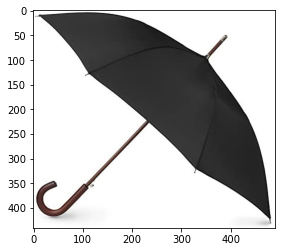

In [100]:
# Plottin the image itself using imread function
import matplotlib.pyplot as plt
plt.imshow(imread(img_0))

Using imread is function from matplotlib library, we are verifying whether the machine is able to read the correct images. This imread function reads the image from file into arrayAnd yes the above image is taken from training-non object folder.

In [101]:
# Extracting the image from the path
os.listdir(train_path+'1')[0]

'bottle.1.jpg'

In [102]:
img_1 = train_path + '1\\'+'bottle.13.jpg'

In [103]:
# Plotting the image in array format
imread(img_1)

array([[[188, 185, 178],
        [186, 183, 176],
        [189, 186, 181],
        ...,
        [ 22,  14,  12],
        [ 22,  14,  12],
        [ 21,  13,  11]],

       [[187, 184, 179],
        [188, 185, 180],
        [191, 188, 183],
        ...,
        [ 22,  14,  12],
        [ 22,  14,  12],
        [ 22,  14,  12]],

       [[185, 182, 177],
        [186, 183, 178],
        [188, 185, 180],
        ...,
        [ 24,  16,  14],
        [ 27,  19,  17],
        [ 26,  18,  16]],

       ...,

       [[196, 193, 188],
        [195, 192, 187],
        [198, 195, 190],
        ...,
        [ 19,  15,  14],
        [ 20,  16,  15],
        [ 21,  17,  16]],

       [[195, 192, 187],
        [194, 191, 186],
        [199, 196, 191],
        ...,
        [ 20,  16,  15],
        [ 22,  18,  17],
        [ 23,  19,  18]],

       [[194, 191, 186],
        [194, 191, 186],
        [198, 195, 190],
        ...,
        [ 19,  15,  14],
        [ 20,  16,  15],
        [ 19,  15,  14]]

In [104]:
imread(img_1).shape

(1860, 4032, 3)

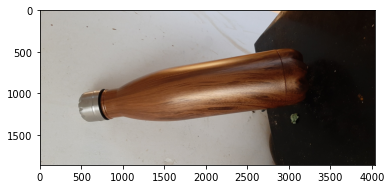

In [105]:
# Plotting the image itself using imread function
plt.imshow(imread(img_1))

We have used the same imread function to read the images in train-object folder.

In [106]:
# Image data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_path,
    target_size=(148, 148),
    batch_size=1,
    color_mode="rgb",
    class_mode='binary',
    seed = 808)

validation_generator = val_datagen.flow_from_directory(val_path,
    target_size=(148, 148),
    batch_size=1,
    class_mode='binary',
    seed = 808)

test_generator = test_datagen.flow_from_directory(test_path,
    target_size=(148, 148),
    batch_size=1,
    class_mode='binary',
    shuffle = False,
    seed = 808)

Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


- Keras image data generator is function which is used to generate data from your disk or use the subset of the data. It is mainly used for data augmentation. 

- Here we are creating a function for training, validation and test datasets using image data generator function and also rescaling them into floats.

- Then we have created train, test and val generators using the above functions and flow from directory. Flow from directory is used to read the images from the specified directory. Paths for train, test, and val are predefined.

- As specified we are using batch size as 1 and the input shape as 148 * 148. Since these images are coloured and have 3 channels we have specified the color_mode as rgb which indicates red, blue and green. And the problem over here is binary problem so we have specified class_mode as binary.

- This returns us the images that are there in our working directory. We have 100 images in the training folder, 30 in the validation folder and 30 in the test folder.

In [107]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', input_shape=(148,148,3) , activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', activation= "relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

- We have imported required libraries from keras.models and keras.layers. We have created a neural network with 2 convolutional layers and 3 dense layers. - - Convolutional 2D layers are used to check for the certain patterns in the image using the filters. Each filter has its own weights and biases, these are learnable parameters. We also use activation function to determine which neuron should be activated. This is done by the weighted sum of the weights, inputs and biases. It also changes the dimensions of the images after this layer.
- Maxpooling 2D layer is used as a dimensionality reduction function.
- Flatten layer is used to convert the image into 1D array.
- Dense layers are fully connected layers. Using activation function it calculates the weighted sum of the weights, inputs and biases of each neuron.

***(Explanation of the layers is from lab-2)

#### Model
- We first tried using the netwrok from lab-2 which resulted in overfitting. Since the dataset we are using over here comparitively very small, we need less learning parameters. 
- We tried cutting down layers and checking accuracy and finally got the better accuracy and loss for the above network.
- We have used ReLU or Rectified Linear Unit as our activation function. It takes the values between 0 and max from the input. It helps for easy back propagation of erros in the layers. Whenever there is a input with negative, ReLU converts them into 0 and not activates those neurons. (Relu explanation from lab-2)
- We have used sigmoid activation function in our output layer, it is used to check the probability. And the probability value generally lies between 0 and 1

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 74, 74, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 43808)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 16)                700944    
_________________________________________________________________
dense_20 (Dense)             (None, 16)               

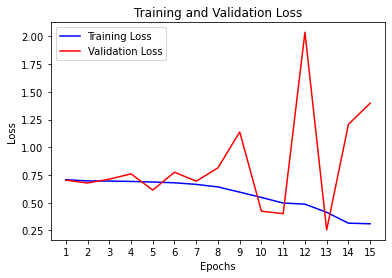

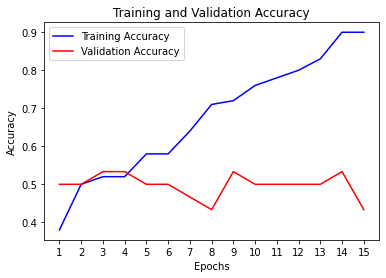

In [108]:
#summary of the model
model.summary()

#Compile the model
from keras.optimizers import Adam, SGD


model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
)
history.history.keys()
import matplotlib.pyplot as plt 

history_dict = history.history

loss_values = history_dict['loss']  
val_loss_values = history_dict['val_loss']

#Plotting loss & accuracy of training and validation datasets
epochs = range(1, len(loss_values)+1) 
# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

import matplotlib.pyplot as plt 

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Compile

- We have compiled the model using optimizer as 'SGD', loss as 'binary_crossentropy'. metrics as'accuracy'
- We then fit the model using train_generator, with 20 epochs, validation_generator and verbose as 1.

#### Evaluation

- Traing loss & accuracy and validation loss & accuracy is stored in history_dict.
- We then extract loss and accuracy of train & validation sets and store into respected variables.
- Using matplotlib.pyplot we have plotted loss of training and validation against x-axis epochs and y-axis loss(line:).
- Using matplotlib.pyplot we have plotted accuracy of training and validation against x-axis epochs and y-axis loss(line:).
- Finally, using model.evaluate we have evaluated the accuracy of test_generator.

In [109]:
#Testing accuracy
score = model.evaluate(test_generator)
print('Testing loss and accuracy of the model is ', score)

30/30 [==============================] - 1s 43ms/step
Testing loss and accuracy of the model is  [0.5579239726066589, 0.699999988079071]


## Part 3: Using Data Augmentation

### Dataset Verification

You should verify that the training, validation, and test sets have the correct number of images (the `os` functions should help with this) and that the data is organized in a folder structure that will work with your image data generators. 

### Dataset Loading and Processing with Create Image Data Generators

You should now create image data generators for your training, validation, and test datasets that will allow you to feed them into your model in batches. The images should be resized to 148x148 pixels and scaled so all pixel values are between 0 and 1. 

### Add Data Augmentation 

You should now add data augmentation to your training data generator. All available types of augmentation should be used. 

Print an image and examples of the same image augmented in different ways. (The `.load_img()` and `.flow()` methods may be helpful here.)

### Create and Evaluate a Baseline Model

Use the best model from **Part 2** to train with the augmented data and evaluate on the validation data to get a baseline accuracy for the new model trained on the augmented dataset. 

### Tune the Model

With a more complex training set, you may be able to improve the accuracy through adjustments to the baseline model architecture and tuning the hyperparameters. 

### Report Accuracy on Test Set 

Your final step is to make predictions using the test set and report the final test set accuracy. It may be helpful to use `batch_size=1` for this step. 

In [110]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

### Image Rotation

In [111]:
image_aug = ImageDataGenerator(rescale=1/255.,rotation_range=50)

train_aug = image_aug.flow_from_directory(train_path, target_size=(148, 148), batch_size=1,
                                                    class_mode='binary', shuffle=True)

Found 100 images belonging to 2 classes.



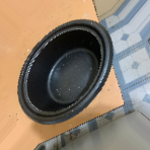
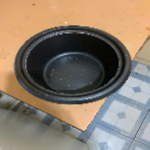
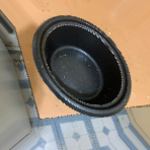
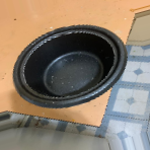
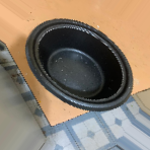


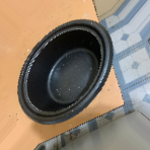
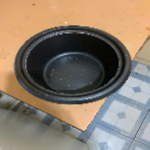
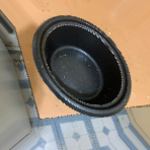
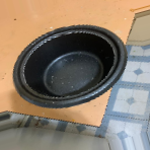
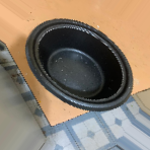

In [112]:
import ipyplot
aug_images = [train_aug[0][0][0] for i in range(5)]
ipyplot.plot_images(aug_images)

- Here we are viewing the same image if we give rotation_range argument as 50. This changes the image by 50 degree of angle while training the model.

### Image Width and Height shift

In [113]:
image_aug = ImageDataGenerator(rescale=1/255.,width_shift_range=0.2, height_shift_range=0.2)

train_aug = image_aug.flow_from_directory(train_path, target_size=(148, 148),batch_size=1,
                                                    class_mode='binary', shuffle=True)

Found 100 images belonging to 2 classes.



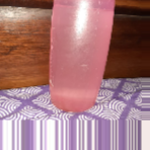
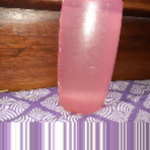
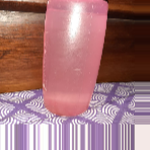
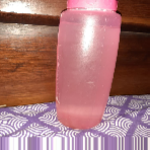
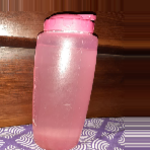


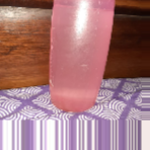
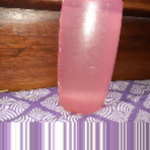
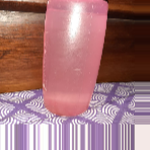
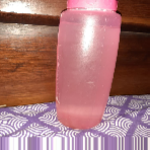
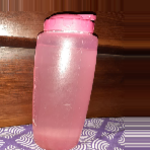

In [114]:
aug_images = [train_aug[0][0][0] for i in range(5)]
ipyplot.plot_images(aug_images)

- Here we are performing height and width shift, this try to shift the pixels of the image to the center. The float is the percentage of the shift.

### Image Shear Range

In [115]:
image_aug = ImageDataGenerator(rescale=1/255.,shear_range=0.4)

train_aug = image_aug.flow_from_directory(train_path,target_size=(148, 148), batch_size=1,
                                                    class_mode='binary', shuffle=True)

Found 100 images belonging to 2 classes.



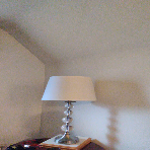
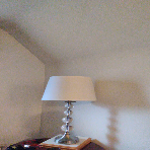
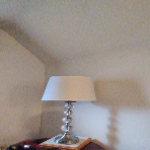
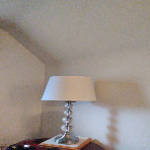
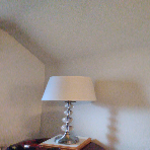


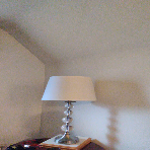
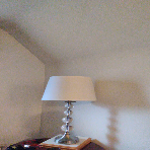
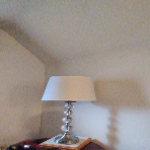
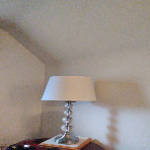
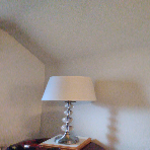

In [116]:
aug_images = [train_aug[0][0][0] for i in range(5)]
ipyplot.plot_images(aug_images)

- Shear range makes the image to reflect in different angles. This lets model to see the image in different angles like how humans view same image in different angles

### Image Zooming

In [117]:
image_aug = ImageDataGenerator(rescale=1./255,zoom_range=0.5)

train_aug = image_aug.flow_from_directory(train_path,target_size=(148, 148),batch_size=1,
                                                    class_mode='binary', shuffle=True)

Found 100 images belonging to 2 classes.



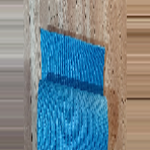
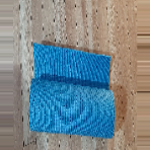
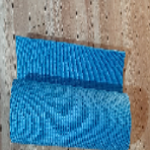
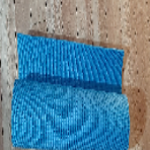
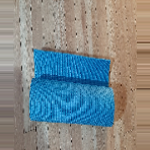


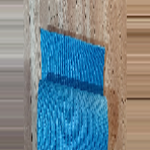
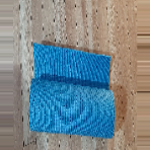
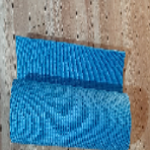
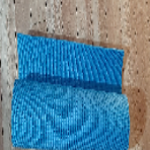
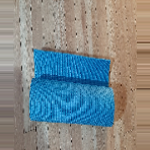

In [118]:
aug_images = [train_aug[0][0][0] for i in range(5)]
ipyplot.plot_images(aug_images)

- Here we are trying to change the zoom of the image by 50% range. This gives us the same image in diffent zooming views.

### Image Horizontal Flip

In [119]:
image_aug = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_aug = image_aug.flow_from_directory(train_path,target_size=(148, 148),batch_size=1,
                                                    class_mode='binary', shuffle=True)

Found 100 images belonging to 2 classes.



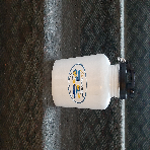
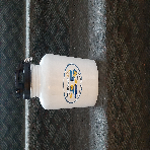
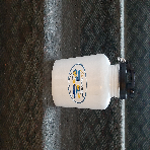
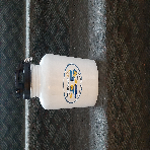
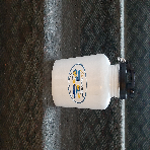


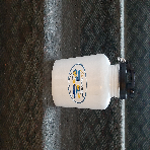
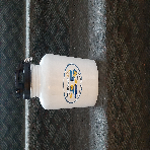
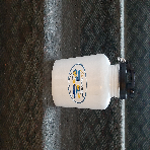
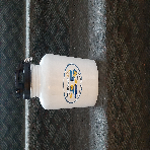
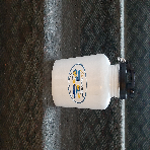

In [120]:
aug_images = [train_aug[0][0][0] for i in range(5)]
ipyplot.plot_images(aug_images)

- Here are we are flipping the same image horizontally, so that the model sees the image in defferent perspectives.

### Image Vertical Flip

In [121]:
image_aug = ImageDataGenerator(rescale=1/255.,vertical_flip=True)

train_aug = image_aug.flow_from_directory(train_path,target_size=(148, 148),batch_size=1,
                                                    class_mode='binary', shuffle=True)

Found 100 images belonging to 2 classes.



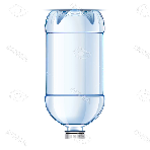
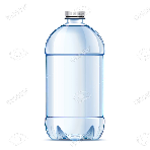
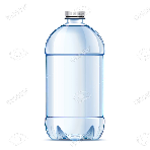
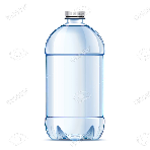
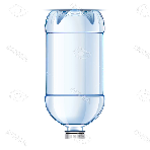


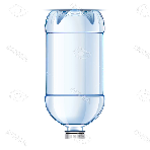
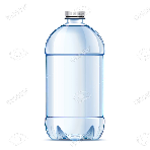
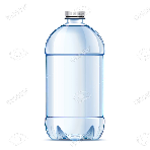
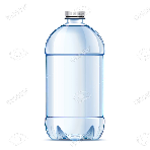
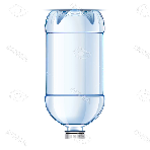

In [122]:
aug_images = [train_aug[0][0][0] for i in range(5)]
ipyplot.plot_images(aug_images)

- Here we are trying to flip the same image vertically, so that the model learn the image in different perspectives.

### Image Fill mode

In [123]:
image_aug = ImageDataGenerator(rescale=1/255.,fill_mode='nearest')

train_aug = image_aug.flow_from_directory(train_path,target_size=(148, 148),batch_size=8,
                                                    class_mode='binary', shuffle=True)

Found 100 images belonging to 2 classes.



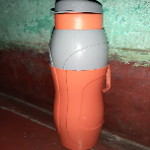
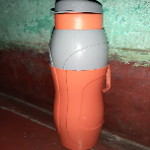
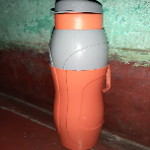
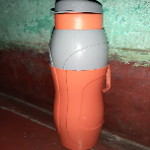
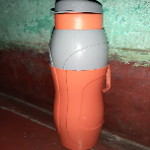


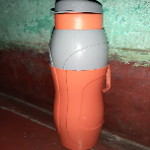
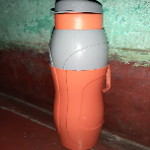
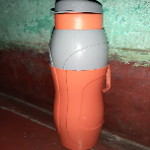
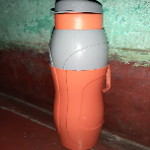
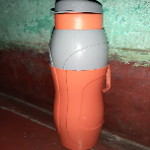

In [124]:
aug_images = [train_aug[0][0][0] for i in range(5)]
ipyplot.plot_images(aug_images)

- When you rotate the image there is a chance where pixels move outside the image, this creates empty space. To remove this we will fill it with the pixels near to that space. This is done by giving fill argument 'nearest'.

### Image Brightness

In [125]:
image_aug = ImageDataGenerator(rescale=1/255.,brightness_range=[0.5,2])

train_aug = image_aug.flow_from_directory(train_path,target_size=(148, 148),batch_size=1,
                                                    class_mode='binary', shuffle=True)

Found 100 images belonging to 2 classes.



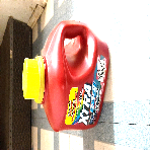
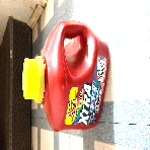
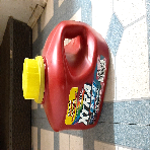
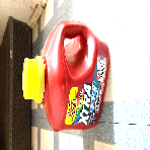
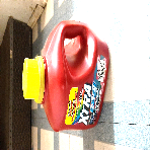


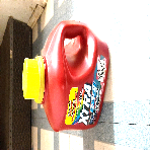
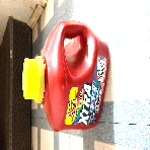
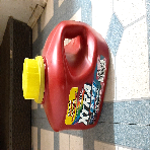
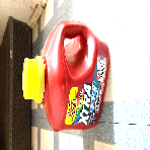
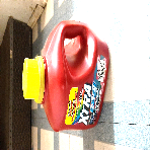

In [126]:
aug_images = [train_aug[0][0][0] for i in range(5)]
ipyplot.plot_images(aug_images)

- Here we are trying to change the brightness of the same image in the range of 0.5 & 2. This creates different images of the same images with different brightness range.

- In part2 we did not use any of the augmentation techniques on the omages flowing. Now we will use all the possible techniques to the images. Augmentation is a technique to view the images in different aspects of the same image. This is done by transforming the same image into several images. This is done by changing fliping, zooming, brightness change, shear change, fill mode, and rotation of the same image.By performing this technique we are creating a larger dataset to train the model effectively. In reality it is not possible to get the image in all possible perspectives or viewings, to tackle this we are using data augmentation technique.

- The above code is just to verify what we are trying to do in augmentation. We are using ipyplot library to display the images.

In [127]:
# Image data generators
train_datagen_aug = ImageDataGenerator(rotation_range=20,width_shift_range=.1,height_shift_range=.1,shear_range=.2, zoom_range=.2,horizontal_flip=True, vertical_flip=True, rescale=1/255., fill_mode='nearest')
val_datagen_aug = ImageDataGenerator( rescale=1/255.)
test_datagen_aug = ImageDataGenerator( rescale=1/255.)

train_generator_aug = train_datagen.flow_from_directory(train_path,target_size=(148, 148),batch_size=1,class_mode='binary',color_mode='rgb', interpolation="lanczos", seed = 808)

validation_generator_aug = val_datagen.flow_from_directory(test_path,target_size=(148, 148),batch_size=1,class_mode='binary',color_mode='rgb', seed = 808)

test_generator_aug = test_datagen.flow_from_directory(val_path,target_size=(148, 148),batch_size=1,class_mode='binary',shuffle=False,color_mode='rgb', seed = 808)

Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


- Earlier we have seen how the image changes when we pass different arguments each time. Now we will pass those arguments all at once to train dataset as instructed. This is done using the keras image data generator function and flow from directory. The arguments passed in the flow from directory are path of the specified forlder, input size which was specified as 148 * 148, batch size as 1 and class as binary.

- This function imports the images in the train, test, and val folders from the directory.

In [128]:
model_1 = Sequential()

model_1.add(Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', input_shape=(148,148,3) , activation="relu"))
model_1.add(MaxPooling2D((2,2)))

model_1.add(Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', activation= "relu"))
model_1.add(MaxPooling2D((2,2)))

model_1.add(Flatten())
model_1.add(Dense(16, activation="relu"))
model_1.add(Dense(16, activation="relu"))
model_1.add(Dense(1, activation="sigmoid"))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 74, 74, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 43808)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                700944    
_________________________________________________________________
dense_23 (Dense)             (None, 16)               

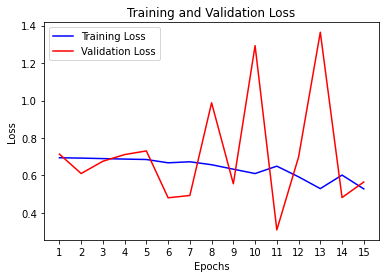

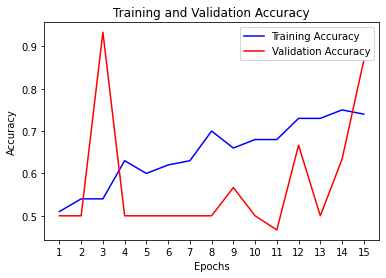

In [129]:
#summary of the model
model_1.summary()

#Compile the model
from keras.optimizers import Adam


model_1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
history = model_1.fit_generator(generator=train_generator_aug,
    steps_per_epoch=len(train_generator_aug),
    epochs=15,
    validation_data=validation_generator_aug,
    validation_steps=len(validation_generator_aug),
    verbose = 1)
history.history.keys()
import matplotlib.pyplot as plt 

history_dict = history.history

loss_values = history_dict['loss']  
val_loss_values = history_dict['val_loss']

#Plotting loss & accuracy of training and validation datasets
epochs = range(1, len(loss_values)+1) 
# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

import matplotlib.pyplot as plt 

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Model
- Using the same network structure as we did for the data without augmentation and checked its accuracy and loss. The accuracy and loss after data augmentation fell.

In [130]:
score = model_1.evaluate(test_generator_aug)
print('Testing loss and accuracy of the model is ', score)

30/30 [==============================] - 1s 41ms/step
Testing loss and accuracy of the model is  [1.1186141967773438, 0.4333333373069763]


In [131]:
model_2 = Sequential()

model_2.add(Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', input_shape=(148,148,3) , activation="relu"))
model_2.add(Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', activation = "relu"))
model_2.add(MaxPooling2D((2,2)))

model_2.add(Conv2D(filters=64, kernel_size=(3, 3), padding = "same", activation = "relu"))
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), padding = 'same', activation= "relu"))
model_2.add(MaxPooling2D((2,2)))

model_2.add(Flatten())
model_2.add(Dense(32, activation="relu"))
model_2.add(Dense(32, activation="relu"))
model_2.add(Dropout(0.3))
model_2.add(Dense(1, activation="sigmoid"))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 74, 74, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 74, 74, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 87616)            

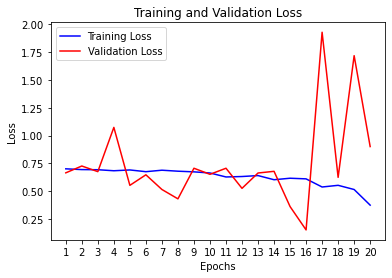

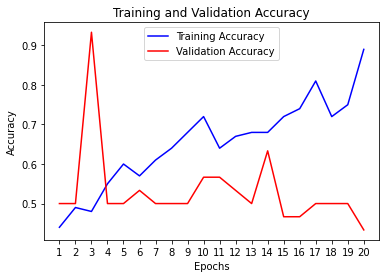

In [132]:
#summary of the model
model_2.summary()

#Compile the model
from keras.optimizers import Adam


model_2.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
history = model_2.fit_generator(generator=train_generator_aug,
    steps_per_epoch=len(train_generator_aug),
    epochs=20,
    validation_data=validation_generator_aug,
    validation_steps=len(validation_generator_aug),
    verbose = 1)
history.history.keys()
import matplotlib.pyplot as plt 

history_dict = history.history

loss_values = history_dict['loss']  
val_loss_values = history_dict['val_loss']

#Plotting loss & accuracy of training and validation datasets
epochs = range(1, len(loss_values)+1) 
# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

import matplotlib.pyplot as plt 

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [133]:
score = model_2.evaluate(test_generator_aug)
print('Testing loss and accuracy of the model is ', score)

30/30 [==============================] - 2s 54ms/step
Testing loss and accuracy of the model is  [1.263087272644043, 0.6333333253860474]


#### Model
- Since the network used for data without augmentation did not work, we added few more convolutional layers and increased the size of the dense layers.
- Now using 2 blocks of convolutional layers which is 2 Conv layers with 32 filters and shape of 3 * 3 and a maxpooling of 2 * 2. Another 2 conv layers with 64 filters and shape of 3 * 3 and a maxpooling of 2 * 2. 
- Dense layers of size 64 and relu actuvation function.
- Before the final layer we have dropout layer=0.3 which is used to remove 30% of the memory of the model and making it try harder to learn newly. 
- Final output layer with 1 neuron and sigmoid activation function.
- Using this network we have achieved test accuracy of 60%

#### Conclusion
- In conclusion, without data augmentation techniques the model was overfitting and the accuracy is not stable. But after data augmentation techniques there is less ovefitting and accuracy is better when compared to previous.
- Only if we had large dataset we could train the model much better and acquire better accuracy.